In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [58]:
def TypeConverter(lst_of_cols, dataset, data_type):
        for i in lst_of_cols:
            dataset[i] = dataset[i].astype(data_type)

In [60]:
cars = pd.read_csv("used_car_cleaned.csv")
cars

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
2,Great,Wall,0.0,Automatic,2022,135000.0
3,Ford,Fusion,178000.0,Automatic,2012,23000.0
4,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0
...,...,...,...,...,...,...
2282,BMW,7,99000.0,Automatic,2015,103000.0
2283,Ford,Expedition,33000.0,Automatic,2018,185000.0
2284,Chevrolet,Tahoe,48000.0,Automatic,2018,135000.0
2285,Chevrolet,Tahoe,50000.0,Automatic,2018,135000.0


In [187]:
Population = pd.read_csv("Population_estimates_by_gender_nationality_and_region_2010_-_2022_data.csv")
Population

,Region,Year,Gender,Nationality,Population estimates
0,Madinah,"2,014",Female,Saudi,"562,344"
1,Tabouk,"2,010",Female,Saudi,"239,792"
2,Hail,"2,013",Female,Saudi,"211,727"
3,Eastern Region,"2,016",Male,Saudi,"1,308,467"
4,Al-Baha,"2,018",Female,Non-Saudi,"16,951"
...,...,...,...,...,...
671,Makkah,"2,015",Male,Saudi,"1,756,374"
672,Al-Baha,"2,015",Male,Saudi,"104,524"
673,Madinah,"2,021",Male,Saudi,"658,453"
674,Tabouk,"2,020",Female,Non-Saudi,"44,416"


- عدد الكثافة السكانية
- عدد السيارات في المملكة

In [188]:
Population.dtypes

Region                  object
Year                    object
Gender                  object
Nationality             object
Population estimates    object
dtype: object

In [189]:
Population['Population estimates'] = Population['Population estimates'].str.replace(',', '')
Population['Year'] = Population['Year'].str.replace(',', '')

categorical = ['Gender', 'Nationality']
Integers = ['Population estimates', 'Year']
TypeConverter(categorical, Population, 'category')
TypeConverter(Integers, Population, 'int64')
Population.dtypes

Region                    object
Year                       int64
Gender                  category
Nationality             category
Population estimates       int64
dtype: object

In [197]:
x = Population.groupby('Region')['Population estimates'].sum()
x = x.sort_values(ascending=False)
x

Region
Riyadh             100108018
Makkah              97544500
Eastern Region      58941043
Madinah             25186608
Aseer               23173451
Jazan               16404516
Qaseem              15858861
Tabouk              10099350
Hail                 8444937
Al-Jouf              6904050
Najran               6761355
Northern Region      4263617
Al-Baha              4002318
Name: Population estimates, dtype: int64

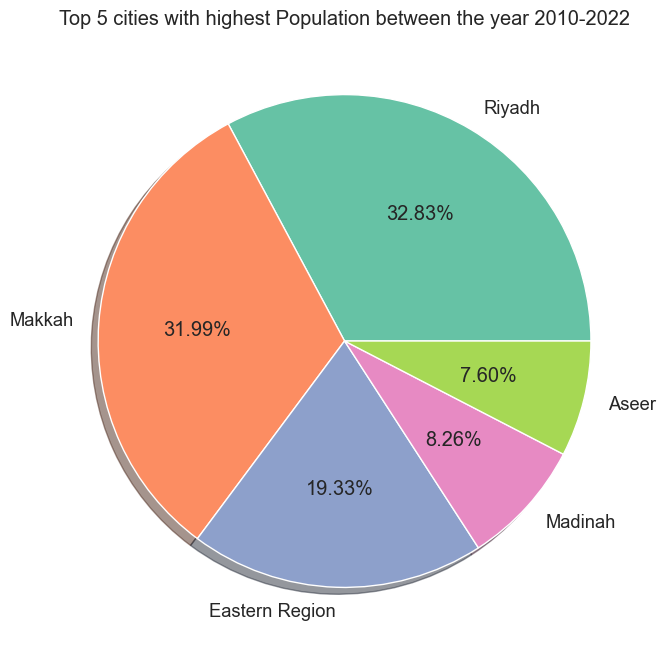

In [198]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

plt.pie(
    x=x[:5].values, 
    labels=x[:5].index,
    autopct='%1.2f%%',
    colors=sns.color_palette('Set2'),
    shadow=True
)
plt.title("Top 5 cities with highest Population between the year 2010-2022")
plt.show()

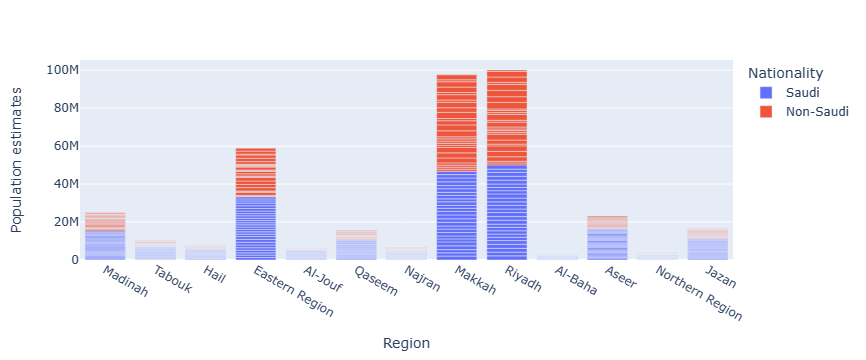

In [291]:
px.bar(data_frame=Population, x='Region', y='Population estimates', color='Nationality')

# Insights: 
- Riyadh take 1st place followed by Makkah 
- the Huge Population can be explained by the huge number by the nonsaudi in these cities 

In [199]:
cars2 = pd.read_csv("saudi-arabia-car-plates-issued-in-the-kingdom-by-type-2004-2008.csv", sep=';')
cars2

,Year,Type,Number of Car Plates Issued
0,1998,Private,323284
1,2000,Private,288632
2,2004,Private,308567
3,2005,Private,401354
4,1998,Taxi,13813
...,...,...,...
155,2012,Vehicles,4110
156,2018,Vehicles,2324
157,1998,Total,507753
158,2011,Total,783537


In [200]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         160 non-null    int64 
 1   Type                         160 non-null    object
 2   Number of Car Plates Issued  160 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.9+ KB


In [201]:
cars2['Type'].value_counts()

Type
Private        23
Taxi           23
Trucks         23
Bus            23
Motor-Cycle    23
Total          23
Vehicles       22
Name: count, dtype: int64

In [202]:
index = cars2[(cars2['Type'] == 'Bus') | (cars2['Type'] == 'Total')].index
cars2.drop(index , inplace=True)
cars2

,Year,Type,Number of Car Plates Issued
0,1998,Private,323284
1,2000,Private,288632
2,2004,Private,308567
3,2005,Private,401354
4,1998,Taxi,13813
...,...,...,...
152,2019,Motor-Cycle,4719
153,1998,Vehicles,30
154,2000,Vehicles,469
155,2012,Vehicles,4110


In [203]:
y = cars2.groupby('Year')['Number of Car Plates Issued'].sum()
y[2018]

1398692

In [204]:
RiyadhPop = Population[(Population['Nationality'] == 'Saudi') & (Population['Gender'] == 'Male') & (Population['Region'] == 'Riyadh')]
RiyadhPop

,Region,Year,Gender,Nationality,Population estimates
37,Riyadh,2016,Male,Saudi,1948993
38,Riyadh,2017,Male,Saudi,1988653
95,Riyadh,2010,Male,Saudi,1669970
180,Riyadh,2012,Male,Saudi,1746263
326,Riyadh,2015,Male,Saudi,1903165
327,Riyadh,2020,Male,Saudi,2144437
369,Riyadh,2014,Male,Saudi,1850887
463,Riyadh,2021,Male,Saudi,2192321
467,Riyadh,2011,Male,Saudi,1704831
534,Riyadh,2013,Male,Saudi,1794724


In [205]:
p = RiyadhPop.groupby('Year')['Population estimates'].sum()
p[2018]

2035530

In [206]:
x = pd.DataFrame(columns = ['Category', 'Volume'])
x.loc[1] = ["Riyadh Population",RiyadhPop['Population estimates'].sum()]
x.loc[2] = ["Vehicles",cars2['Number of Car Plates Issued'].sum()]
x.loc[3] = ["Riyadh Population of 2018",p[2018]]
x.loc[4] = ["Vehicles of 2018",y[2018]]
x

,Category,Volume
1,Riyadh Population,25308481
2,Vehicles,16842140
3,Riyadh Population of 2018,2035530
4,Vehicles of 2018,1398692


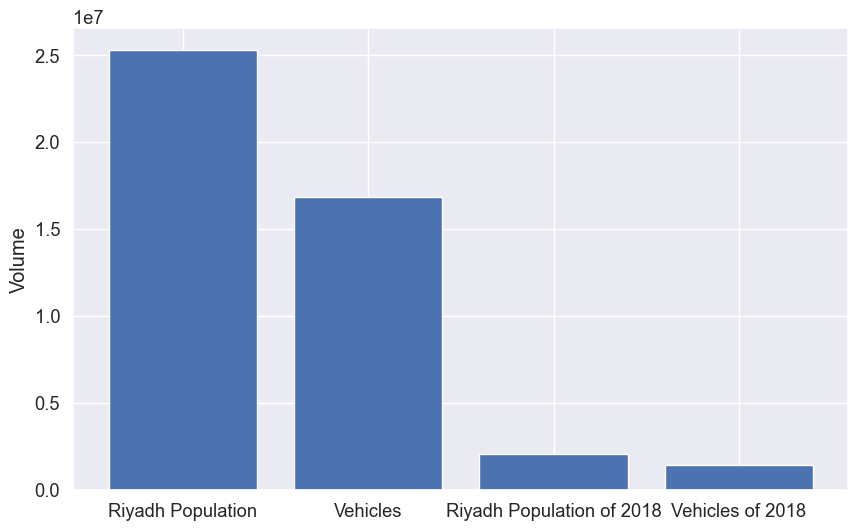

In [209]:
plt.figure(figsize=(10,6))

plt.bar(
    data=x,
    x='Category', 
    height='Volume',
)
plt.ylabel('Volume')
plt.show()

# Insights: 
- Vehicles Volume is 3/4 riyadh Population
- the plates issued in 2018 alone is almost = to the riyadh Population in 2018

In [154]:
public_transport_KSA = pd.read_excel("the-number-of-public-transport-passengers-by-year-and-city_team2.xlsx")
public_transport_KSA

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,المدينة,اجمالي عدد ركاب النقل العام خلال السنة(2016),اجمالي عدد ركاب النقل العام خلال السنة(2017),اجمالي عدد ركاب النقل العام خلال السنة(2018),اجمالي عدد ركاب النقل العام خلال السنة(2019),اجمالي عدد ركاب النقل العام خلال السنة(2020),اجمالي عدد ركاب النقل العام خلال السنة(2021),اجمالي عدد ركاب النقل العام خلال السنة(2022)
6,NaN,الرياض,1409890.5,1690540,5082110.928571,8142886,3911449,5813692,6017436
7,NaN,جدة,853839,1161330.5,2769925.944444,4033215,2287532,3992553,4401483
8,NaN,المدينة المنورة,1370139.9,1902893.8,1496747.079365,1287501,203355,0,287539
9,NaN,الدمام,650363,729328.5,444746.4,267401,73683.333333,0,54849


In [155]:
public_transport_KSA = public_transport_KSA.drop([0,1,2,3,4])
public_transport_KSA = public_transport_KSA.drop('Unnamed: 0', axis=1)
row = public_transport_KSA.iloc[0]#The iloc() method can be used to select rows and columns from a DataFrame by index label. 
col_mapp = {
    'Unnamed: 1': row.iloc[0],
    'Unnamed: 2': row.iloc[1],
    'Unnamed: 3': row.iloc[2],
    'Unnamed: 4': row.iloc[3],
    'Unnamed: 5': row.iloc[4],
    'Unnamed: 6': row.iloc[5],
    'Unnamed: 7': row.iloc[6],
    'Unnamed: 8': row.iloc[7]
}
public_transport_KSA =public_transport_KSA.set_axis(list(col_mapp.values()), axis=1)
public_transport_KSA = public_transport_KSA.drop(5)
public_transport_KSA

,المدينة,اجمالي عدد ركاب النقل العام خلال السنة(2016),اجمالي عدد ركاب النقل العام خلال السنة(2017),اجمالي عدد ركاب النقل العام خلال السنة(2018),اجمالي عدد ركاب النقل العام خلال السنة(2019),اجمالي عدد ركاب النقل العام خلال السنة(2020),اجمالي عدد ركاب النقل العام خلال السنة(2021),اجمالي عدد ركاب النقل العام خلال السنة(2022)
6,الرياض,1409890.5,1690540,5082110.928571,8142886,3911449,5813692,6017436
7,جدة,853839,1161330.5,2769925.944444,4033215,2287532,3992553,4401483
8,المدينة المنورة,1370139.9,1902893.8,1496747.079365,1287501,203355,0,287539
9,الدمام,650363,729328.5,444746.4,267401,73683.333333,0,54849


In [213]:
public_transport_KSA.dtypes

المدينة                                         object
اجمالي عدد ركاب النقل العام خلال السنة(2016)    object
اجمالي عدد ركاب النقل العام خلال السنة(2017)    object
اجمالي عدد ركاب النقل العام خلال السنة(2018)    object
اجمالي عدد ركاب النقل العام خلال السنة(2019)    object
اجمالي عدد ركاب النقل العام خلال السنة(2020)    object
اجمالي عدد ركاب النقل العام خلال السنة(2021)    object
اجمالي عدد ركاب النقل العام خلال السنة(2022)    object
dtype: object

In [233]:
public_transport_KSA.iloc[:,0] = ['Riyadh','Jeddah', 'Al-madinah', 'Dammam']
public_transport_KSA

,المدينة,اجمالي عدد ركاب النقل العام خلال السنة(2016),اجمالي عدد ركاب النقل العام خلال السنة(2017),اجمالي عدد ركاب النقل العام خلال السنة(2018),اجمالي عدد ركاب النقل العام خلال السنة(2019),اجمالي عدد ركاب النقل العام خلال السنة(2020),اجمالي عدد ركاب النقل العام خلال السنة(2021),اجمالي عدد ركاب النقل العام خلال السنة(2022)
6,Riyadh,1409890.5,1690540,5082110.928571,8142886,3911449,5813692,6017436
7,Jeddah,853839,1161330.5,2769925.944444,4033215,2287532,3992553,4401483
8,Al-madinah,1370139.9,1902893.8,1496747.079365,1287501,203355,0,287539
9,Dammam,650363,729328.5,444746.4,267401,73683.333333,0,54849


In [240]:
public_transport_KSA.iloc[0][1]

1409890.5

In [261]:
TransKSA = pd.DataFrame(columns = ['City', 'Year', 'Volume'])
TransKSA

,City,Year,Volume


In [262]:
year = 2015
for i in range(4): 
    for j in range(1,8):
        TransKSA.loc[len(TransKSA)] = [public_transport_KSA.iloc[i][0], year+j, public_transport_KSA.iloc[i][j]]
    year = 2015
    
TransKSA

,City,Year,Volume
0,Riyadh,2016,1.409890e+06
1,Riyadh,2017,1.690540e+06
2,Riyadh,2018,5.082111e+06
3,Riyadh,2019,8.142886e+06
4,Riyadh,2020,3.911449e+06
5,Riyadh,2021,5.813692e+06
6,Riyadh,2022,6.017436e+06
7,Jeddah,2016,8.538390e+05
8,Jeddah,2017,1.161330e+06
9,Jeddah,2018,2.769926e+06


In [263]:
TransKSA.dtypes

City       object
Year        int64
Volume    float64
dtype: object

In [264]:
TransKSA['Volume'] = TransKSA['Volume'].astype('int64')
TransKSA

,City,Year,Volume
0,Riyadh,2016,1409890
1,Riyadh,2017,1690540
2,Riyadh,2018,5082110
3,Riyadh,2019,8142886
4,Riyadh,2020,3911449
5,Riyadh,2021,5813692
6,Riyadh,2022,6017436
7,Jeddah,2016,853839
8,Jeddah,2017,1161330
9,Jeddah,2018,2769925


In [280]:
f = TransKSA.groupby('City')['Volume'].sum()
f

City
Al-madinah     6548174
Dammam         2220370
Jeddah        19499877
Riyadh        32068003
Name: Volume, dtype: int64

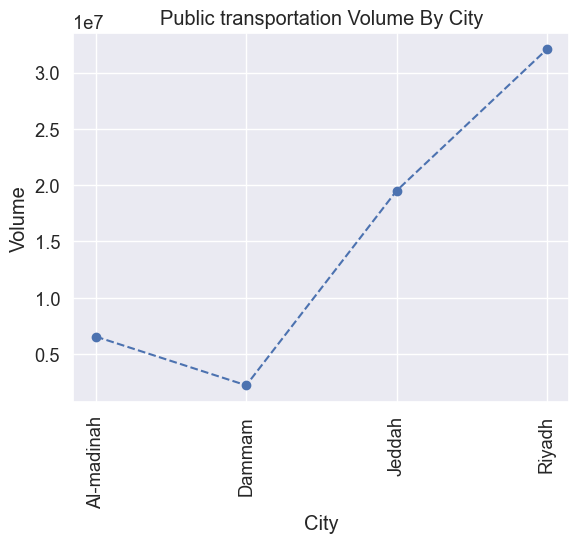

In [282]:
plt.plot(
    f.index, f.values,
    marker='o', linestyle='--',
    color='b', label='Volume'
)

plt.title('Public transportation Volume By City')
plt.xlabel('City')
plt.ylabel('Volume')
plt.xticks(rotation=90)
plt.show();

# Insights: 
- thought the small number of people using public transportation in almadinah and dammam the numbers are high in riyadh and jeddah 
- the high number might be caused by the the high number of non-saudi but there is no solid data to prove so

In [283]:
NYT = pd.read_csv("bus_ridership_New_York_City_Transit.csv")
NYT

,Year,Average Weekday,Average Saturday,Average Sunday,Average Weekend,Annual Total
0,2016,2038119,1221299,957427,2178725,638413113
1,2017,1923993,1168978,923694,2092672,602620356
2,2018,1811605,1122626,868057,1990683,569361220
3,2019,1770394,1108809,847931,1956740,557036504
4,2020,980374,671835,532002,1203837,316768454
5,2021,984865,646302,482090,1128392,311893583


In [284]:
NYT['Annual Total'].sum()

2996093230

In [293]:
x = pd.DataFrame(columns = ['Category', 'Volume'])
x.loc[1] = ["KSA 2016 - 2022",TransKSA['Volume'].sum()]
x.loc[2] = ["NY 2016",NYT['Annual Total'].sum()]
x

,Category,Volume
1,KSA 2016 - 2022,60336424
2,NY 2016,2996093230


<BarContainer object of 2 artists>

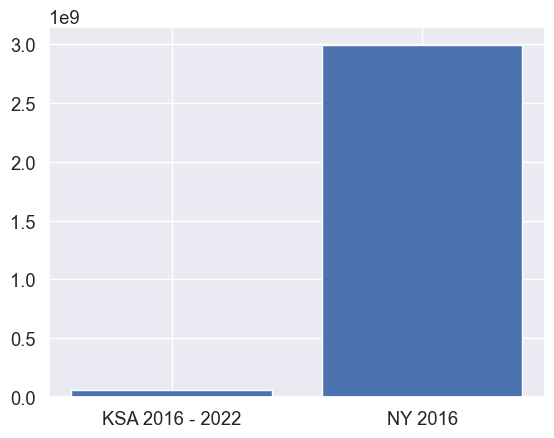

In [294]:
plt.bar(x['Category'], x['Volume'])